<a href="https://colab.research.google.com/github/Lebengeniesser/Pytorch_Practice/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


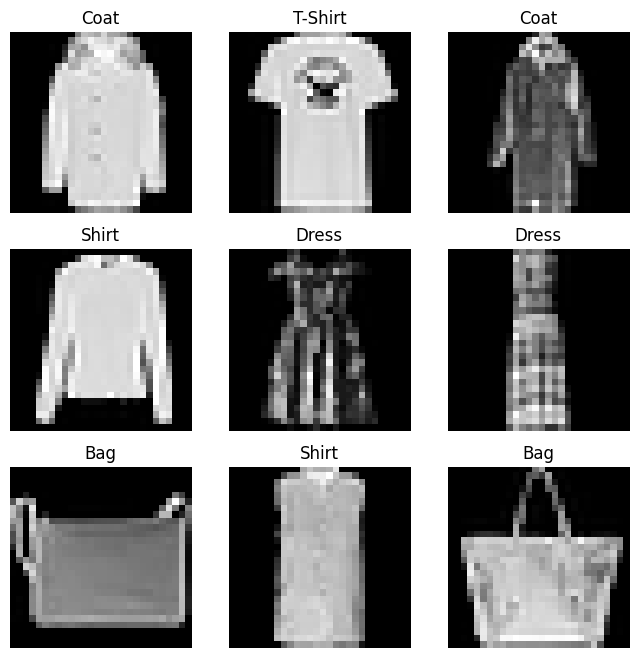

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


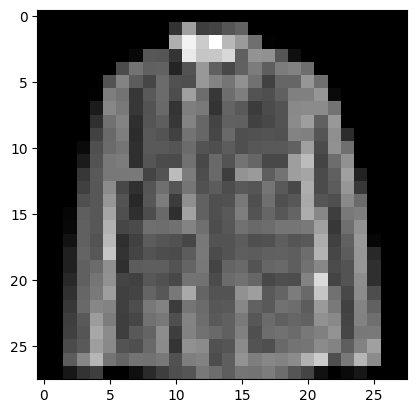

Label: 4
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Predicted class: tensor([0])
torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[ 0.2432,  0.0215, -0.1114,  0.2832, -0.2062, -0.4124, -0.0792, -0.1810,
          0.2635, -0.3328, -0.0139, -0.0343,  0.4476, -0.0455,  0.0451,  0.2349,
          0.1063,  0.6268,  0.3025, -0.0362],
        [ 0.4247,  0.4568, -0.0959,  0.0642, -0.0090, -0.0021, -0.1526,  0.1106,
          0.3600, -0.2734,  0.0910, -0.0979,  0.3406,  0.5094,  0.1592,  0.5250,
          0.3447,  0.7291,  0.5577, -0.1177],
        [ 0.3142,  0.1857, -0.2566,  0.1179, -0.1763, -0.1595, -0.0350,  0.2837,
          0.1704, -0.1680,  0.0491, -0.2188,  0.064

In [56]:
seconds_in_a_day = 24 * 60 *60
seconds_in_a_day
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week
#Pytorch 데이터 작업하기
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

 #공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
#데이터셋을 순회하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#파일에서 사용자 정의 데이터셋 만들기
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, naems=['fill_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    #init함수는 Dataset객체가 생성되때 한번만 실행된다.

  def __len__(self):
    return len(self.img_labels)
#len 함수는 데이터셋의 샘플 개수를 반환한다.
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_imgae(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(imgae)
    if self.target_transform:
      label = self.target_trandsform(label)
    return image, label
#getitem함수는 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.  
#===============================================
#DataLoader로 학습용 데이터 준비하기
from torch.utils.data import DataLoader
#DataLoader는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회(객체화) 가능한 객체이다.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#이미지와 라벨을 표시한다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") #Feature batch shape: torch.Size([64, 1, 28, 28]) 사이즈가28 x 28이다.
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#모델 만들기
#PyTorch에서 신경망 모들은nn.Module을 상속받은 클래스를 생성하여 정의한다. __init__함수에서 신경망의 계층(layer)들을정의하고
#forward함수에서 신경망에 데이터를 어떻게 전달할지 지정한다. 가능한 경우 GPU로 신경망을 이동시켜 연산을 가속(accelerate)한다.


#학습을 위한 장치 얻기
#가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 학습하려고한다. torch.cuda를 사용할 수있는지확인하고
#그렇지 않으면 CPU를 계속 사용한다.
device = "cuda" if torch.cuda.is_available() else "cpu" #지금은 cpu사용 gpu없다는 소리
print(f"Using {device} device")

#모델을 정의한다.(클래스 정의하기)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

#신경망은 데이터에 대한 연산을 수행하는 계층/모듈로 구성되어 있다.
import os
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#모델을 사용하기 위해 입력 데이터를 전달한다. 이는 일부 백그라운드 연산들과 함께 모델의 forward를 실행한다.
#model.forward()호출 하지 말기
#모델에 입력을 전달하여 호출하면 2차원 텐서를 반환한다. 2차원 텐서의 dim=0은 각 분류에 대한 행 예측값 10개가, dim=1에는
#각 출력의 개별 값들이 해당합니다. 원시 예측값을 nn.Softmax모듈의 인스턴스에 통과시켜 예측확률을 얻는다.
#torch는 클레스이며 그 안에 tensor라는 배열이나 행렬과 매우 유사한 특수한 자료구조이다.
#텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 매개변수를 부호화(encode)합니다.
X = torch.rand(1, 28, 28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

#모델 계층(Layer)

input_image = torch.rand(3, 28,28)
print(input_image.size())

#nn.Flatten  계층을 초기화하여 각 28x28의 2D 이미지를 784픽셀 값을 갖는 연속된 배열로 변환합니다.
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

#nn.Linear 선형 계층은 저장된 가중치(weight)와 편향(bias)을 사용하여 입력에 선형 변환(linear transformation)을 적용하는 모듈이다.
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

#nn.ReLu 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만든다.
#비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕닌다.
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1) #원래 hidden1비선형이엉서 ReLU에 입력으로 한다는 의미 
print(f"After RELU: {hidden1}")#들어갔다 나온 것

#nn.Sequential 은 순서를 갖는 모듈의 컨테이너입니다. 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다.
#순차 컨테이너(sequentioal container)를 사용하여 아래의 seq_modules와 같은 신경망을 빠르게 만들수 있다.

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#nn.Softmax 신경망의 마지막 선형 계층은 nn.Softmax모듈에 전달될 ([-infty, infty]범위의 원시 값(raw value)인) logits를 반환한다.
#logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록[0,1]범위로 비례하여 조정(scale)된다. dim 매개변수는 값의 합이 1이 되는 차원을 나타낸다.
softmax = nn.Softmax(dim =1)
pred_probab = softmax(logits)

#모델 매개변수
#신경망 내부의 많은 계층들은 매개변수화된다. 즉, 학습 중에 최적화되는 가중치